# Exercise 4.1 Implementation of the TEBD algorithm

In [41]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -------------------------------------- 162.8/162.8 kB 4.9 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.1/7.7 MB 34.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.7/7.7 MB 28.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.5/7.7 MB 31.6 MB/s eta 0:00:01
   -------------------------- ------------- 5.0/7.7 MB 29.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.7 MB 23.5 MB/s eta 0:00:01
   ------------------------------ --------- 5.8/7.7 MB 21.6 MB/s eta 0:00:01
   ---------------------------------- ----- 6.6/7.7 MB 20.1 MB/s eta 0:00:01
   ------------------------------------- -- 7.1/7.7 MB 19.0 MB/s eta 0:00:01
   -------------------

In [42]:
import a_mps, b_model, c_tebd
import numpy as np
import importlib
import matplotlib.pyplot as plt

In [14]:
importlib.reload(a_mps)
importlib.reload(b_model)
importlib.reload(c_tebd)

<module 'c_tebd' from 'c:\\Users\\work\\OneDrive - TUM\\Dokumente\\Studium\\QST MSc\\FoPra\\FoPra 32\\c_tebd.py'>

## Part a)

- Read the code in the file a_mps.py. This file defines the class MPS in an objectoriented approach. In short, defining the class is defining a “type” which collects data in attributes (e.g. MPS.Bs, MPS.L) and has methods (e.g. MPS.site_expectation_value) which can use the attributes (referenced with the special first argument self) for calculations. 

- Generate an instance of the MPS class representing the state
|↑↑ . . . ↑> with the function init_spinup_MPS, for the start with L = 14 sites.

- Check that the (site) expectation values of the operators $\sigma_z = \left(\begin{matrix}
1 & 0 \\
0 & -1 
\end{matrix}\right)$ and $\sigma_x = \left(\begin{matrix}
0 & 1 \\
1 & 0 
\end{matrix}\right)$ give the expected values.

In [4]:
spinup_mps = a_mps.init_spinup_MPS(L = 14)

In [5]:
sigma_z = np.array([[1, 0], [0, -1]])
sigma_x = np.array([[0, 1], [1, 0]])

In [6]:
# Sigma z expectation value
spinup_mps.site_expectation_value(sigma_z)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
# Sigma x expectation value
spinup_mps.site_expectation_value(sigma_x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Part b)

- Write a function similar to init_spinup_MPS, but initialize an MPS for the state|→→ · · · →>. 
- Check the expectation values again.

Hint: This state is also a product state of |→i = 1 √2
(|↑i + |↓i), so the singular values remain the same and the shape of each B is still (1,2,1). You should expect rounding errors of the order of machine precision ≈ 10−15.

In [16]:
spinright_mps = a_mps.init_spinright_MPS(L = 14)

In [19]:
# Sigma z expectation value
spinright_mps.site_expectation_value(sigma_z)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
# Sigma x expectation value
spinright_mps.site_expectation_value(sigma_x)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Part c)

Read the file b_model.py. It defines a class representing the transverse field ising model for a given choice of coupling parameters. 

- Calculate the energy for
L = 14, J = 1 and g ∈ { 0.5, 1, 1.5 } for each of the above defined two product states. 
- For later usage, extend the model or write a new model class which also
includes the longitudinal field h.

In [22]:
# Define the models with transverse field for g = 0
tf_model_05 = b_model.TFIModel(L = 14, J = 1, g = 0.5)
tf_model_10 = b_model.TFIModel(L = 14, J = 1, g = 1)
tf_model_15 = b_model.TFIModel(L = 14, J = 1, g = 1.5)

In [24]:
# Calculate energies for the spin-up state
tf_model_05.energy(spinup_mps), tf_model_10.energy(spinup_mps), tf_model_15.energy(spinup_mps), 

(-7.0, -14.0, -21.0)

In [26]:
# Calculate energies for the spin-right state
tf_model_05.energy(spinright_mps), tf_model_10.energy(spinright_mps), tf_model_15.energy(spinright_mps), 

(-12.999999999999996, -12.999999999999996, -12.999999999999996)

In [29]:
# Model with longitudinal field
tlf_model = b_model.TFIModel(L = 14, J = 1, g = 0.5, h = 1)
tlf_model.energy(spinright_mps)

-26.999999999999993

## Part d)

- Read the file c_tebd.py, which implements the time evolving block decimation. 
- Call the function example_TEBD_gs_finite, which performs an imaginary time evolution to project onto the ground state.

In [30]:
c_tebd.example_TEBD_gs_finite(L = 14, J = 1, g = 1)

finite TEBD, (imaginary time evolution)
L=14, J=1.0, g=1.00
dt = 0.10000: E = -17.4149126671984
dt = 0.01000: E = -17.4657339106461
dt = 0.00100: E = -17.4704766397477
dt = 0.00010: E = -17.4709480543445
dt = 0.00001: E = -17.4709952214514
final bond dimensions:  [2, 4, 8, 16, 21, 24, 24, 24, 21, 16, 8, 4, 2]


(-17.470995221451425,
 <b_model.TFIModel at 0x1d9dda8dfd0>)

# Exercise 4.2 Ground State Phase Diagram

## Part a)

Write a function to (efficiently) calculate (equal-time) correlation functions like <ψ|XiYj |ψ> for some single-site operators X, Y , which are applied on sites i and j, respectively. The functions should take |ψ> ,X, Y and i as an input and calculate the correlations <ψ|XiYj |ψ> for all j ≥ i.

In [17]:
spinup_mps_2 = a_mps.init_spinup_MPS(L = 14)
spinup_mps_2.correltation_function(sigma_x, sigma_x, 1)

[1.0,
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.),
 array(0.)]

## Part b)

Run TEBD in imaginary time for some values of g and L = 30 (e.g. g = 0.3, 0.5, 0.8, 0.9, 1., 1.1, 1.2, 1 5). Calculate and plot the correlations <σxL/4 σx_j>. Does it agree with your expectations? How do the correlations decay at g = 1 and g > 1?

In [33]:
psis = []
for g_i in [0.3, 0.5, 0.9, 1, 1.1, 1.2, 1.5]:
    psis.append(c_tebd.example_TEBD_gs_finite(L = 30, J = 1, g = g_i)[1])

finite TEBD, (imaginary time evolution)
L=30, J=1.0, g=0.30
dt = 0.10000: E = -29.7237778057965
dt = 0.01000: E = -29.7243442589172
dt = 0.00100: E = -29.7244030096187
dt = 0.00010: E = -29.7244089062471
dt = 0.00001: E = -29.7244094959373
final bond dimensions:  [2, 4, 8, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 12, 8, 4, 2]
finite TEBD, (imaginary time evolution)
L=30, J=1.0, g=0.50
dt = 0.10000: E = -31.0307109228222
dt = 0.01000: E = -31.0351587180616
dt = 0.00100: E = -31.0356104605838
dt = 0.00010: E = -31.0356557268945
dt = 0.00001: E = -31.0356602537848
final bond dimensions:  [2, 4, 8, 14, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 18, 14, 8, 4, 2]
finite TEBD, (imaginary time evolution)
L=30, J=1.0, g=0.90
dt = 0.10000: E = -35.8871314247928
dt = 0.01000: E = -35.9508804906787
dt = 0.00100: E = -35.9569507821110
dt = 0.00010: E = -35.9575557280163
dt = 0.00001: E = -35.9576162465736
final bond

## Part c)

Plot the phase transition in the order parameter m (magnetization) by using the relation

<σx_i σx_j> → m^2 for |i − j| → ∞,

meaning that the correlations approach a constant value of the magnetization squared for large distances. Make sure to exclude boundary effects.

In [38]:
corrs = []
for psi in psis:
    corrs.append(psi.correltation_function(sigma_x, sigma_x, 8))

Text(0, 0.5, 'Correlation $<\\sigma_x^i \\sigma_x^j>$')

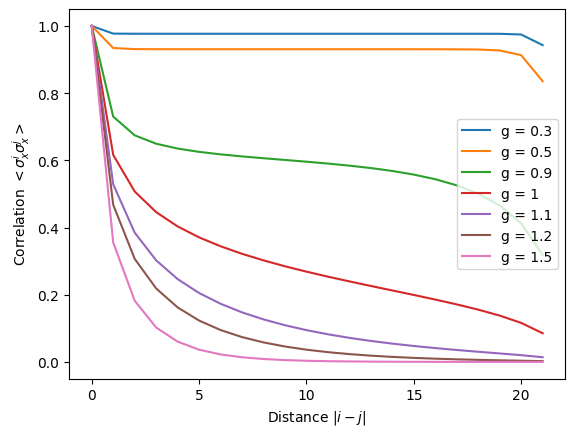

In [43]:
# Plot Correlation

fig = plt.figure()
gs = [0.3, 0.5, 0.9, 1, 1.1, 1.2, 1.5]
x = [j for j in range(30 - 8)]
for i in range(len(corrs)):
    plt.plot(x, corrs[i], label = F"g = {gs[i]}")
plt.legend()
plt.xlabel(r"Distance $|i - j|$")
plt.ylabel(r"Correlation $<\sigma_x^i \sigma_x^j>$")

Text(0, 0.5, 'Magnetization $m$')

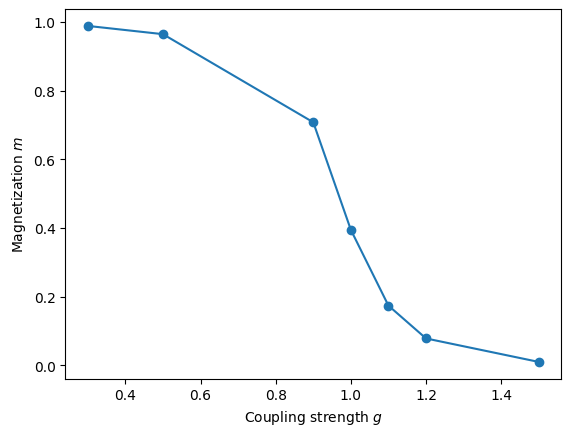

In [54]:
# Plot Magneitzation

mag = []
for c in corrs:
    mag.append(np.sqrt(c[18]))
    
plt.scatter(gs, mag)
plt.plot(gs, mag, "-")
plt.xlabel(r"Coupling strength $g$")
plt.ylabel(r"Magnetization $m$")